# ***Sentiment Analysis using Lexicon-based approach and bing Liu division***

In [189]:
import pandas as pd



In [190]:

df = pd.read_csv(r'/content/reviews_data.csv')
df.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [191]:
df.isna().sum()

name             0
location         0
Date             0
Rating         145
Review           0
Image_Links      0
dtype: int64

# **Sentimental analysis**
# Analysis with Bing liu lexicon

In [192]:
from sklearn import preprocessing
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize


In [193]:
!pip install nltk

In [194]:
import nltk
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [195]:
from nltk.corpus import opinion_lexicon

pos_score = 1
neg_score = -1
word_dict = {}

# Adding the positive words to the dictionary
for word in opinion_lexicon.positive():
    word_dict[word] = pos_score

In [196]:
# Adding the negative words to the dictionary
for word in opinion_lexicon.negative():
    word_dict[word] = neg_score


In [197]:
def bing_liu_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    return sentiment_score


In [198]:
def score_division(scores):
    sentiment = ['positive' if score > 0
                              else 'negative' if score < 0
                                  else 'neutral'
                                      for score in scores]
    return sentiment


In [199]:
!pip install nltk

In [200]:
import nltk
import pandas as pd
from nltk.corpus import opinion_lexicon
from nltk import word_tokenize

In [201]:
df = pd.read_csv("/content/reviews_data.csv")

In [202]:
pos_score = 1
neg_score = -1
word_dict = {}

# Adding the positive words to the dictionary
for word in opinion_lexicon.positive():
    word_dict[word] = pos_score

# Adding the negative words to the dictionary
for word in opinion_lexicon.negative():
    word_dict[word] = neg_score

In [203]:
from nltk import word_tokenize

In [204]:
def bing_liu_score(text):
  sentiment_score = 0
  bag_of_words = word_tokenize(text.lower())
  for word in bag_of_words:
    if word in word_dict:
      sentiment_score += word_dict[word]
  return sentiment_score

# ***Download the required NLTK data:***

In [205]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# ***Run the code***

In [206]:
df['Bing_Liu_Score'] = df['Review'].apply(bing_liu_score)
df['Bing_Liu_division'] = score_division(df['Bing_Liu_Score'])

df.head()

,name,location,Date,Rating,Review,Image_Links,Bing_Liu_Score,Bing_Liu_division
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],5,positive
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],9,positive
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,3,positive
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],6,positive
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,10,positive


In [207]:
df['Review']

0      Amber and LaDonna at the Starbucks on Southwes...
1      ** at the Starbucks by the fire station on 436...
2      I just wanted to go out of my way to recognize...
3      Me and my friend were at Starbucks and my card...
4      I’m on this kick of drinking 5 cups of warm wa...
                             ...                        
845    I ordered two venti frappacino's without whipp...
846                                       No Review Text
847    DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...
848                                       No Review Text
849                                       No Review Text
Name: Review, Length: 850, dtype: object

# ***Analysis with affin lexicon***

In [208]:
!pip install afinn

In [209]:
from afinn import Afinn

# ***Calculate and store the scores:***

In [210]:
afn = Afinn()
df['Afinn_Score'] = df['Review'].apply(lambda article: afn.score(article))

In [211]:
df.rename(columns={'Afinn_Score': 'afinn_score'}, inplace=True)

# ***Calculate the sentimental division***

In [212]:
df['afinn_division'] = score_division(df['afinn_score'])

# ***Display the first five rows of the dataframe***

In [213]:
df.head()

,name,location,Date,Rating,Review,Image_Links,Bing_Liu_Score,Bing_Liu_division,afinn_score,afinn_division
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],5,positive,6.0,positive
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],9,positive,14.0,positive
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,3,positive,3.0,positive
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],6,positive,14.0,positive
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,10,positive,14.0,positive


# ***Comparision with original data***

In [214]:
df.columns

Index(['name', 'location', 'Date', 'Rating', 'Review', 'Image_Links',
       'Bing_Liu_Score', 'Bing_Liu_division', 'afinn_score', 'afinn_division'],
      dtype='object')

In [215]:
'division' in df.columns

False

In [216]:
df.head()

,name,location,Date,Rating,Review,Image_Links,Bing_Liu_Score,Bing_Liu_division,afinn_score,afinn_division
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],5,positive,6.0,positive
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],9,positive,14.0,positive
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,3,positive,3.0,positive
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],6,positive,14.0,positive
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,10,positive,14.0,positive


# ***Bing Liu division***

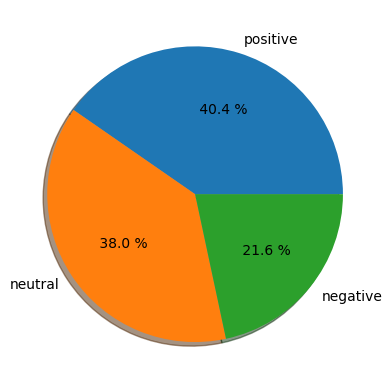

In [220]:
import matplotlib.pyplot as plt

plt.pie(df['Bing_Liu_division'].value_counts(), labels = ['positive', 'neutral', 'negative'],

autopct ='% 1.1f %%', shadow = True)
plt.show()

# ***afinn division***

In [186]:
df.columns

Index(['sentiment', 'division'], dtype='object')

In [151]:
import matplotlib.pyplot as plt

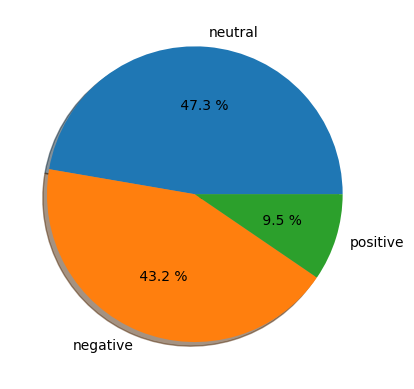

In [221]:
plt.pie(df['afinn_division'].value_counts(), labels = {'positive', 'neutral', 'negative'},

autopct ='% 1.1f %%', shadow = True)
plt.show()

In [224]:
df['afinn_score'].value_counts()[0]

81

In [230]:
def acc_calculator(scores):
    return scores[0] / (scores[0] + scores[1])

afinn_score = acc_calculator(df['afinn_score'].value_counts())
Bing_Liu_score = acc_calculator(df['Bing_Liu_Score'].value_counts())

print(f'afinn accuracy :{afinn_score}')
print(f'Bing Liu accuracy :{Bing_Liu_score}')

afinn accuracy :0.6694214876033058
Bing Liu accuracy :0.673992673992674
